In [1]:
# import pytorch_v2
from pytorch_v2 import TorchGame
from matplotlib import pyplot as plt
import torch
import numpy as np
params_test = {
        "Horizon": 3, "Max_actions_chosen": 2, "N_actions_startpoint": 8, "I": .5, "D": 5,
        "Players_action_length": [5, 5], "Max_optim_iter": 75, "Filter_actions": True,
        "Stochastic_state_update": True, "base_params": "paper", "NumRepsBattle": 8,
        "DEVICE": "cpu", "MultiProcess": False
    }

game = TorchGame(**params_test) 
# game.InitialState

          PlayerA_y  PlayerB_y
sen_tec           4          4
col_sys           2          2
tec_mob           3          3
cont_alg          5          5
loc_map           3          3
sen_fus           3          3
ai_ml             2          2
edg_com           2          2
com_net           4          4
ene_mgm           4          4
sim_mod           2          2
hum_man           3          3
cyb_sec           3          3
eth_reg           2          2
          sen_tec  col_sys  tec_mob  cont_alg  loc_map  sen_fus  ai_ml   
A,B             0        0        0         0        0        0      0  \
Phi, Psi        9        3        1         3        3        9      3   
n_a,n_b         3        3        1         3        1        3      9   
p_a,p_b         9        1        1         3        9        3      1   
n_y,n_z         9        9        9         3        3        9      3   
p_y,p_z         9        3        3         3        3        3      9   
u,v             0

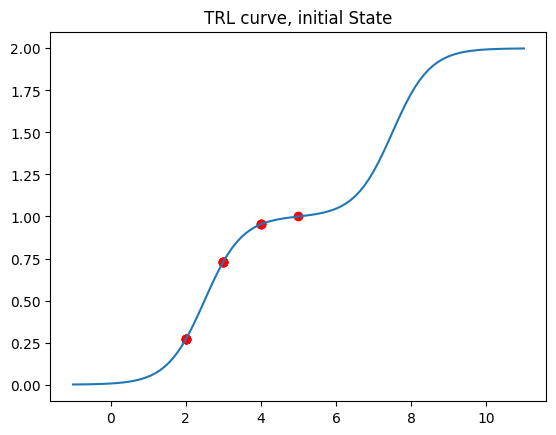

In [2]:
# plt.scatter(game.InitialState[:,1],game.TechnologyReadiness(game.InitialState)[:,1])
states = torch.tensor(np.linspace(-1,11,100))
trl_base = game.TechnologyReadiness(states)

init_state_A = game.InitialState[:,0].tolist()
trl_A = game.TechnologyReadiness(game.InitialState)[:,0].tolist()
theta_A = game.techToParams(game.InitialState)[:,0].tolist()


plt.plot(states, trl_base)
plt.scatter(init_state_A, trl_A, color="red")
plt.title("TRL curve, initial State")
plt.show()


nTech, nParams = game.PARAMCONVERSIONMATRIX.size()

state_A = game.InitialState[:,0].tolist()
trl_A = game.TechnologyReadiness(game.InitialState)[:,0].tolist()
theta_A = game.techToParams(game.InitialState)[:,0].tolist()

state_B = game.InitialState[:,1].tolist()
trl_B = game.TechnologyReadiness(game.InitialState)[:,1].tolist()
theta_B = game.techToParams(game.InitialState)[:,1].tolist()







8 14


array([4.21626358, 2.47145811, 3.23019677, 5.51487309, 3.30344802,
       3.21971481, 2.3960599 , 2.23566847, 4.49389341, 4.45197546,
       2.27235946, 3.4828628 , 3.42127597, 2.28995037])

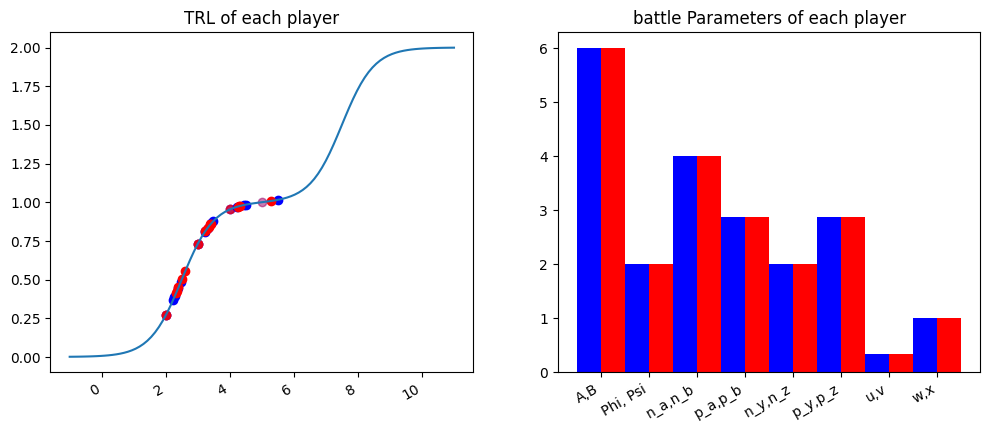

In [25]:
def plot_state(state, action):
    nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
    print(nParams, nTech)
    
    act_norm = game.normAction(action)
    new_state = game.Update_State(state, action, False)

    state_A = game.InitialState[:,0].numpy()
    trl_A = game.TechnologyReadiness(game.InitialState)[:,0].numpy()
    theta_A = game.techToParams(game.InitialState)[:,0].numpy()
    action_A = act_norm[:,0].numpy()
    new_state_A = new_state[:,0].numpy()
    new_trl_A = game.TechnologyReadiness(new_state)[:,0].numpy()
    new_theta_A = game.techToParams(new_state)[:,0].numpy()
    
    state_B = game.InitialState[:,1].numpy()
    trl_B = game.TechnologyReadiness(game.InitialState)[:,1].numpy()
    theta_B = game.techToParams(game.InitialState)[:,1].numpy()
    action_B = act_norm[:,1].numpy()
    new_state_B = new_state[:,1].numpy()
    new_trl_B = game.TechnologyReadiness(new_state)[:,1].numpy()
    new_theta_B = game.techToParams(new_state)[:,1].numpy()
    
    display(new_state_A)
    
    
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12,5)
    axs[0].plot(states, trl_base)
    #old states
    axs[0].scatter(state_A, trl_A, color="blue", alpha = .3)
    axs[0].scatter(state_B, trl_B, color="red", alpha = .3)
    #new states
    axs[0].scatter(new_state_A, new_trl_A, color="blue", alpha = 1)
    axs[0].scatter(new_state_B, new_trl_B, color="red", alpha = 1)
    #arrow
    # axs[0].arrow(x=state_A, y=trl_A, dx=new_state_A - state_A, dy=new_trl_A - trl_A, color="blue" )
    # axs[0].arrow(x=state_B, y=trl_B, dx=new_state_B - state_B, dy=new_trl_B - trl_B, color="red" )
    
    
    axs[0].set_title("TRL of each player")

    width = .5
    r = np.arange(nParams)
    axs[1].set_title("battle Parameters of each player")
    axs[1].bar(r, theta_A, color="blue", width= width)
    axs[1].bar(r+width, theta_B, color="red", width= width)
    # axs[1].xticks(r + width/2 , labels = game.ParamNames)
    axs[1].set_xticks(r + width/2)
    axs[1].set_xticklabels(labels = game.ParamNames)



    # fig.show()
    fig.autofmt_xdate()
    
action = torch.rand(size=[28,])
plot_state(game.InitialState, action)

8 14


array([4.46023768, 2.25786781, 3.270724  , 5.31133819, 3.39125669,
       3.35944232, 2.48258907, 2.39305145, 4.31936735, 4.30448413,
       2.29703179, 3.50632256, 3.24457927, 2.40170774])

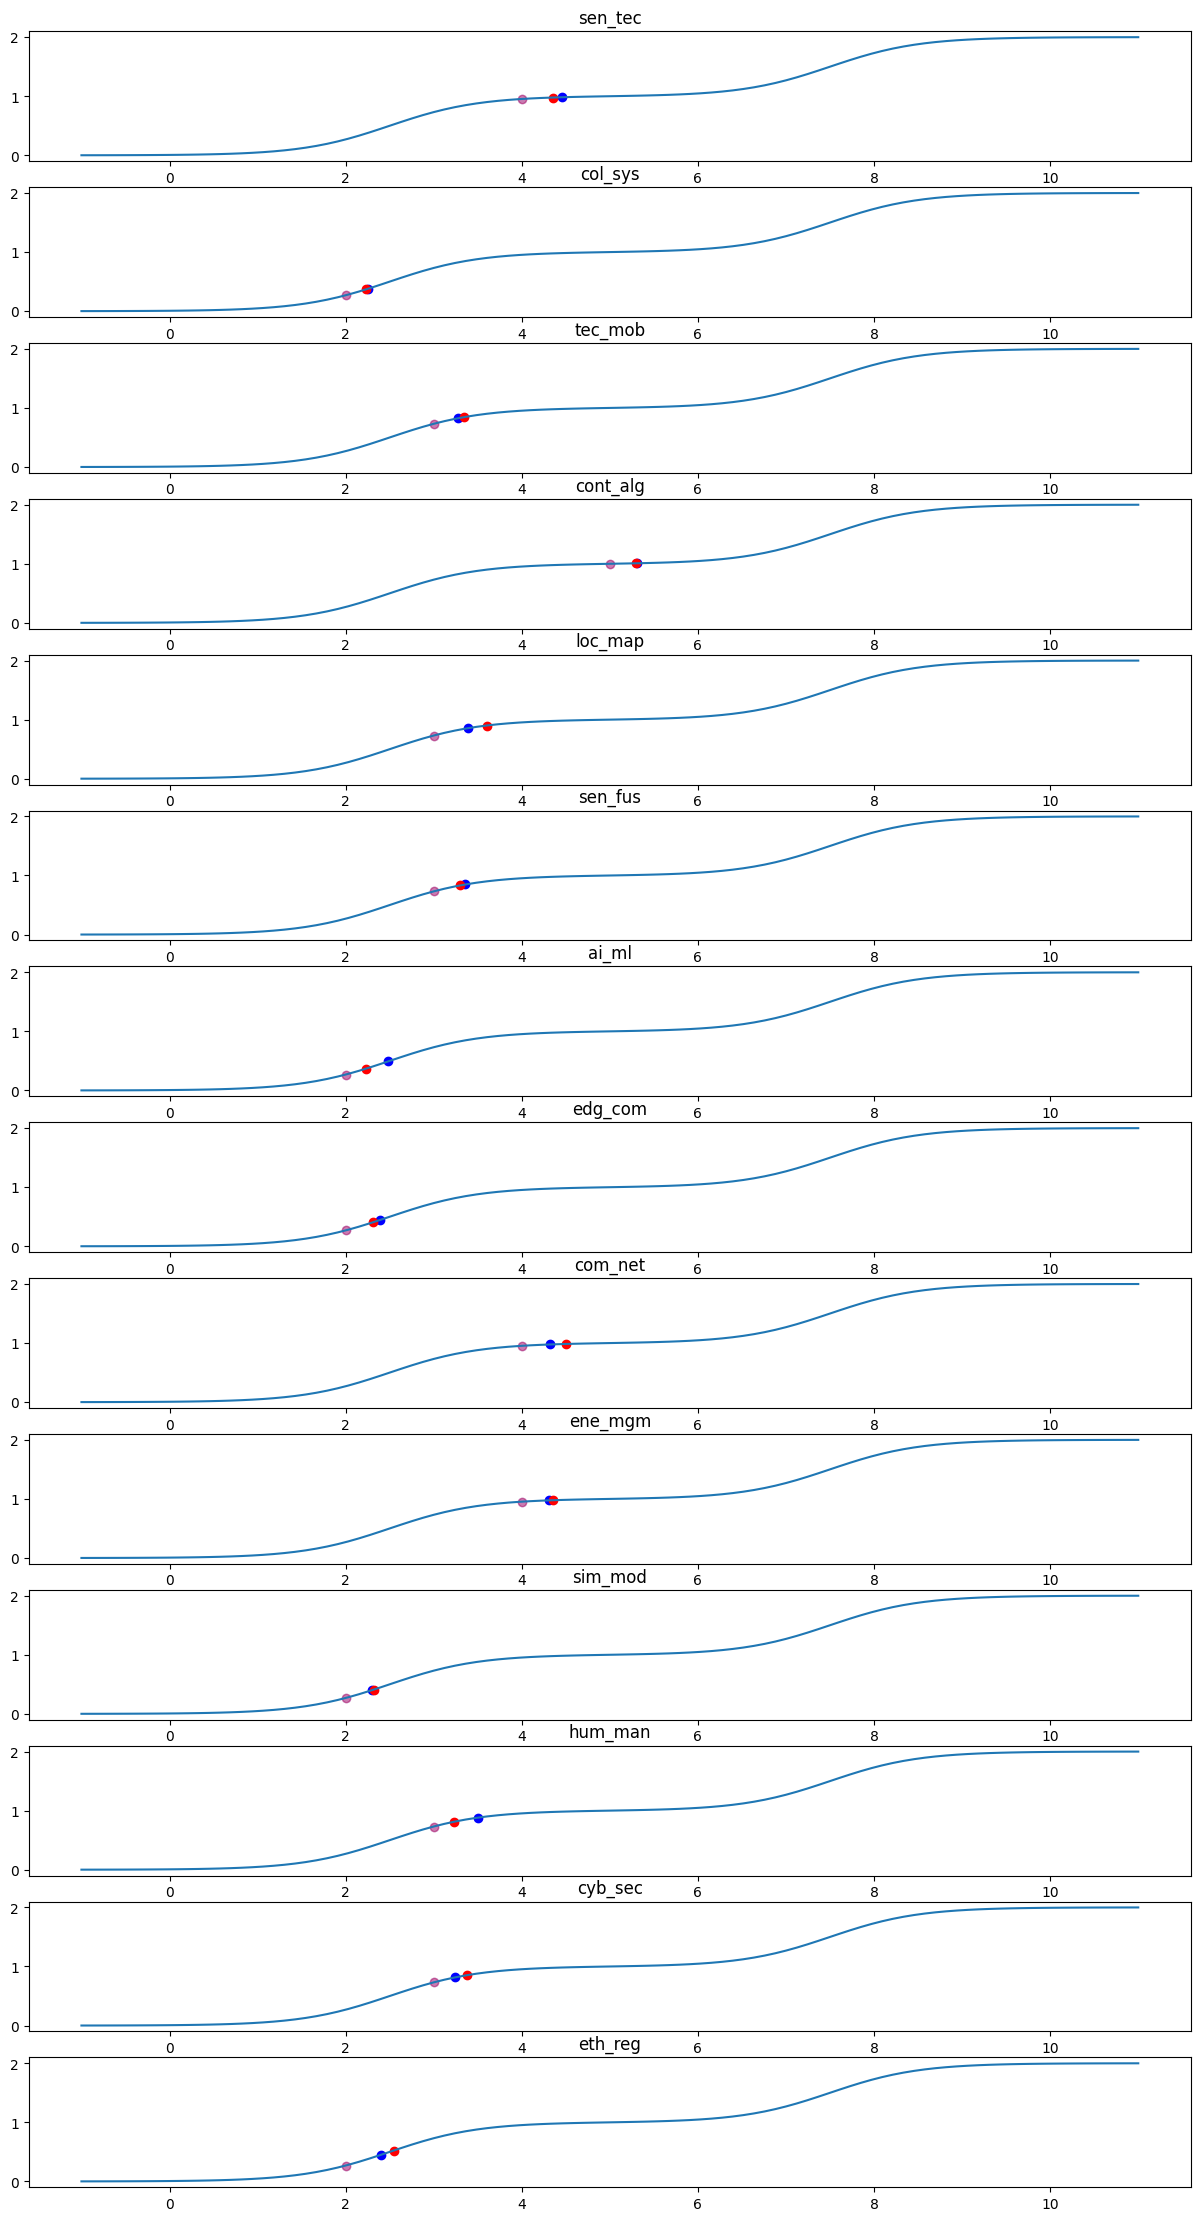

In [29]:
def plot_trl(state, action):
    nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
    print(nParams, nTech)
    
    act_norm = game.normAction(action)
    new_state = game.Update_State(state, action, False)

    state_A = game.InitialState[:,0].numpy()
    trl_A = game.TechnologyReadiness(game.InitialState)[:,0].numpy()
    theta_A = game.techToParams(game.InitialState)[:,0].numpy()
    action_A = act_norm[:,0].numpy()
    new_state_A = new_state[:,0].numpy()
    new_trl_A = game.TechnologyReadiness(new_state)[:,0].numpy()
    new_theta_A = game.techToParams(new_state)[:,0].numpy()
    
    state_B = game.InitialState[:,1].numpy()
    trl_B = game.TechnologyReadiness(game.InitialState)[:,1].numpy()
    theta_B = game.techToParams(game.InitialState)[:,1].numpy()
    action_B = act_norm[:,1].numpy()
    new_state_B = new_state[:,1].numpy()
    new_trl_B = game.TechnologyReadiness(new_state)[:,1].numpy()
    new_theta_B = game.techToParams(new_state)[:,1].numpy()
    
    display(new_state_A)
    
    
    fig, axs = plt.subplots(nTech, 1)
    fig.set_size_inches(15,28)
    for i in range(nTech):
        
        axs[i].plot(states, trl_base)
    #old states
        axs[i].scatter(state_A[i], trl_A[i], color="blue", alpha = .3)
        axs[i].scatter(state_B[i], trl_B[i], color="red", alpha = .3)
        #new states
        axs[i].scatter(new_state_A[i], new_trl_A[i], color="blue", alpha = 1)
        axs[i].scatter(new_state_B[i], new_trl_B[i], color="red", alpha = 1)
        axs[i].set_title(game.TechnologyNames[i])
    
action = torch.rand(size=[28,])
plot_state(game.InitialState, action)